#### Sr. Engineer: Dhruv Singh <br> Course Name: EDHEC Portfolio Optimization <br> Lesson Name: Max Drawdown <br> Date Updated: 01/09/2022

# Computing Maximum Drawdown

<AxesSubplot:xlabel='Date'>

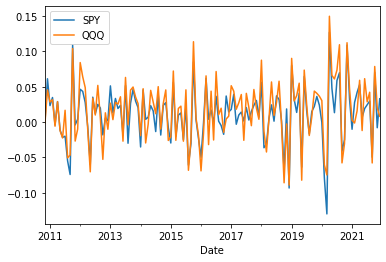

In [2]:
import pandas as pd

me_m = pd.read_csv("data/etf_data.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['SPY', 'QQQ']].pct_change()
# rets.columns = ['SmallCap', 'LargeCap']
rets = rets.dropna()
rets.plot.line()

## Timeseries - forcing the index to be a datetime

In [3]:
rets.index

DatetimeIndex(['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01',
               '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01',
               '2011-07-01', '2011-08-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Date', length=134, freq=None)

In [4]:
# converting index to datetime manually if necessary
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01',
               '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01',
               '2011-07-01', '2011-08-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Date', length=134, freq=None)

In [7]:
# convenient way of indexing datetime index
rets["2011"]

,SPY,QQQ
Date,,
2011-01-01,0.023300,0.028278
2011-02-01,0.034737,0.031607
2011-03-01,-0.004206,-0.005885
2011-04-01,0.028961,0.028731
2011-05-01,-0.011215,-0.012187
2011-06-01,-0.021720,-0.022447
2011-07-01,-0.020005,0.016652
2011-08-01,-0.054976,-0.050690
2011-09-01,-0.074210,-0.046676


In [8]:
# converting to monthly data format
rets.index = rets.index.to_period('M')
rets.head()

,SPY,QQQ
Date,,
2010-11,0.000000,-0.001725
2010-12,0.061271,0.045498
2011-01,0.023300,0.028278
2011-02,0.034737,0.031607
2011-03,-0.004206,-0.005885


In [9]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 134 entries, 2010-11 to 2021-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     134 non-null    float64
 1   QQQ     134 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [10]:
rets.describe()

,SPY,QQQ
count,134.000000,134.000000
mean,0.011091,0.016220
std,0.038746,0.044277
min,-0.129987,-0.089213
25%,-0.007678,-0.012143
50%,0.014533,0.019649
75%,0.032589,0.045393
max,0.126984,0.149737


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for SPY.

<AxesSubplot:xlabel='Date'>

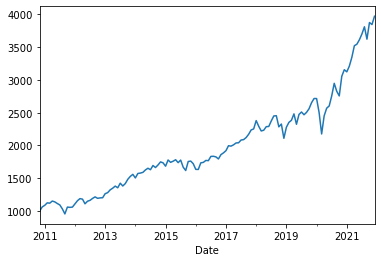

In [11]:
wealth_index = 1000*(1+rets["SPY"]).cumprod()
wealth_index.plot()

<AxesSubplot:xlabel='Date'>

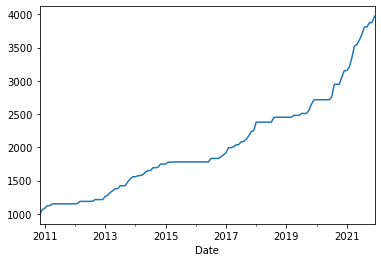

In [12]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:xlabel='Date'>

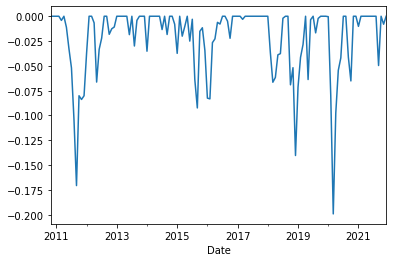

In [13]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [14]:
drawdown.min()

-0.1991859441614029

<AxesSubplot:xlabel='Date'>

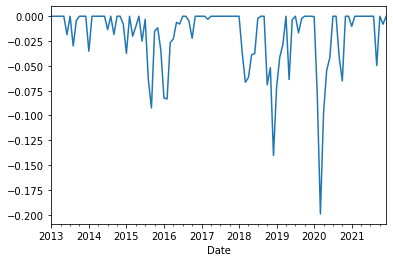

In [15]:
drawdown["2013":].plot()

In [16]:
drawdown["2013":].min()

-0.1991859441614029

# Creating a Drawdown Function

In [17]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["SPY"]).head()

,Wealth,Previous Peak,Drawdown
Date,,,
2010-11,1000.000000,1000.000000,0.000000
2010-12,1061.271011,1061.271011,0.000000
2011-01,1085.998778,1085.998778,0.000000
2011-02,1123.723489,1123.723489,0.000000
2011-03,1118.997369,1123.723489,-0.004206


In [18]:
drawdown(rets["SPY"]).min()

Wealth            954.932939
Previous Peak    1000.000000
Drawdown           -0.199186
dtype: float64

In [19]:
drawdown(rets["QQQ"]).min()

Wealth           998.275201
Previous Peak    998.275201
Drawdown          -0.173533
dtype: float64

In [20]:
drawdown(rets["SPY"])["Drawdown"].idxmin()

Period('2020-03', 'M')

In [21]:
drawdown(rets["QQQ"])["Drawdown"].idxmin()

Period('2018-12', 'M')

In [22]:
drawdown(rets["SPY"]["2013":])["Drawdown"].idxmin()

Period('2020-03', 'M')

In [23]:
drawdown(rets["QQQ"]["2013":])["Drawdown"].idxmin()

Period('2018-12', 'M')

In [24]:
drawdown(rets["QQQ"]["2013":])["Drawdown"].min()

-0.17353335141280538